## Image Categorization
### Kaylee Cho
#### Mar 3 2024, group mate: Duyen (pls grade us together!)

Read Me! <br>
We are doing image recognition task here, in particular detecting the language of written text.
It involves the concepts of convolutional networks, and understanding how the network structure affects to the model capabilities and training time. <br>
Training dataset contains: 4100 images of Danish, 8500 images of English, 6500 imaages of Russian, 7425 images of Thai, and 5300 images of Chinese text. <br>
I'm going to build neural network that can distinguish between these langauges. On top of these training files, there are appoximately fourth as many validation images. The files are split into two folders: validation and training. Besides of the number of files in these folders, there is no real difference between training and testing images. <br>
The files are named as source_LANG-xxx.jpg. source refers to the source text, LANG is languages, and xxx refers to the alphabetically ordered chunk id. The images are mostly of similar size, 256 * 256 or so. All images are grayscale only, and all text is printed in the same point size.

### Loading Data

In [2]:
# extract file data from zip
import zipfile as zf
files = zf.ZipFile("validation.zip", 'r')
files.extractall('detect-language')
files.close()

FileNotFoundError: [Errno 2] No such file or directory: 'validation.zip'

In [6]:
# extract file data from zip
import zipfile as zf
files = zf.ZipFile("train.zip", 'r')
files.extractall('detect-language')
files.close()

### Modeling

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import sys

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
## Define image properties:
imgDir = "detect-language"
targetWidth, targetHeight, channels = 256, 256, 1
imageSize = (targetWidth, targetHeight)
print("Load images from", imgDir)

In [4]:
## Prepare dataset for training model:
filenames = os.listdir(os.path.join(imgDir, "train-cropped"))

import random
# Randomly select 1000 filenames - for sampling
filenames = random.sample(filenames, 1000)

print(len(filenames), "images found")
trainingResults = pd.DataFrame({
    'filename':filenames,
    'category':pd.Series(filenames).str.slice(-10,-8)
})

# Display sample data
print("data files:")
print(trainingResults.sample(5))

# Count and display categories
nCategories = trainingResults.category.nunique()
print("categories:\n", trainingResults.category.value_counts())

1000 images found
data files:
                                filename category
259  aakjaer-samlede-verker-3_DA-cqr.jpg       DA
591               novel_00025_TH-acn.jpg       TH
158                 evolution_EN-egd.jpg       EN
549               novel_00056_TH-abm.jpg       TH
314                 evolution_EN-dnd.jpg       EN
categories:
 category
EN    243
TH    235
RU    232
ZN    172
DA    118
Name: count, dtype: int64


In [5]:
## Create model
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,\
    MaxPooling2D, AveragePooling2D,\
    Dropout,Flatten,Dense,Activation,\
    BatchNormalization
# sequential (not recursive) model (one input, one output)
model=Sequential()

model.add(Conv2D(128,
                 kernel_size=4,
                 strides=3,
                 activation='relu',
                 kernel_initializer = initializers.HeNormal(),
                 input_shape=(targetWidth, targetHeight, channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(256,
                 kernel_size=9,
                 kernel_initializer = initializers.HeNormal(),
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,
                kernel_initializer = initializers.HeNormal(),
                activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(nCategories,
                kernel_initializer = initializers.HeNormal(),
                activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 85, 85, 128)       2176      
                                                                 
 batch_normalization (Batch  (None, 85, 85, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 42, 42, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 42, 42, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 256)       2654464   
                                                                 
 batch_normalization_1 (Bat  (None, 34, 34, 256)       1

In [6]:
## Training and validation data generator:
trainingGenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
).\
    flow_from_dataframe(trainingResults,
                        os.path.join(imgDir, "train-cropped"),
                        x_col='filename', y_col='category',
                        target_size=imageSize,
                        class_mode='categorical',
                        color_mode="grayscale",
                        shuffle=True)
label_map = trainingGenerator.class_indices
## Model Training:
history = model.fit(
    trainingGenerator,
    epochs = 15
)

Found 1000 validated image filenames belonging to 5 classes.
Epoch 1/15
32/32 [==============================] - 123s 4s/step - loss: 1.5052 - accuracy: 0.5130
Epoch 2/15
32/32 [==============================] - 122s 4s/step - loss: 0.9160 - accuracy: 0.6890
Epoch 3/15
32/32 [==============================] - 121s 4s/step - loss: 0.7165 - accuracy: 0.7600
Epoch 4/15
32/32 [==============================] - 122s 4s/step - loss: 0.6177 - accuracy: 0.7900
Epoch 5/15
32/32 [==============================] - 121s 4s/step - loss: 0.5586 - accuracy: 0.8010
Epoch 6/15
32/32 [==============================] - 121s 4s/step - loss: 0.5187 - accuracy: 0.8200
Epoch 7/15
32/32 [==============================] - 123s 4s/step - loss: 0.5189 - accuracy: 0.8070
Epoch 8/15
32/32 [==============================] - 121s 4s/step - loss: 0.4811 - accuracy: 0.8160
Epoch 9/15
32/32 [==============================] - 122s 4s/step - loss: 0.4480 - accuracy: 0.8340
Epoch 10/15
32/32 [=============================

7967 validation images
7967 validation files read from detect-language/validation-cropped
Found 7967 validated image filenames.
 --- Predicting on validation data ---
249/249 [==============================] - 289s 1s/step
Predicted probability array shape: (7967, 5)
Example:
 [[4.21761870e-01 2.11569443e-01 3.27774853e-01 3.80814821e-02
  8.12314276e-04]
 [1.07465996e-06 7.11702919e-09 7.57573559e-07 3.32620621e-05
  9.99964893e-01]
 [6.79311812e-01 2.95580149e-01 2.15044525e-02 2.83604418e-03
  7.67639489e-04]
 [8.66755128e-01 1.17619745e-01 4.63094935e-03 6.47190865e-03
  4.52233851e-03]
 [5.29592065e-11 2.34794226e-13 1.40060602e-10 1.06783560e-07
  9.99999821e-01]]
[[4.21761870e-01 2.11569443e-01 3.27774853e-01 3.80814821e-02
  8.12314276e-04]
 [1.07465996e-06 7.11702919e-09 7.57573559e-07 3.32620621e-05
  9.99964893e-01]
 [6.79311812e-01 2.95580149e-01 2.15044525e-02 2.83604418e-03
  7.67639489e-04]
 ...
 [5.88522494e-01 3.55699867e-01 5.29496111e-02 7.41733005e-04
  2.08630715e-

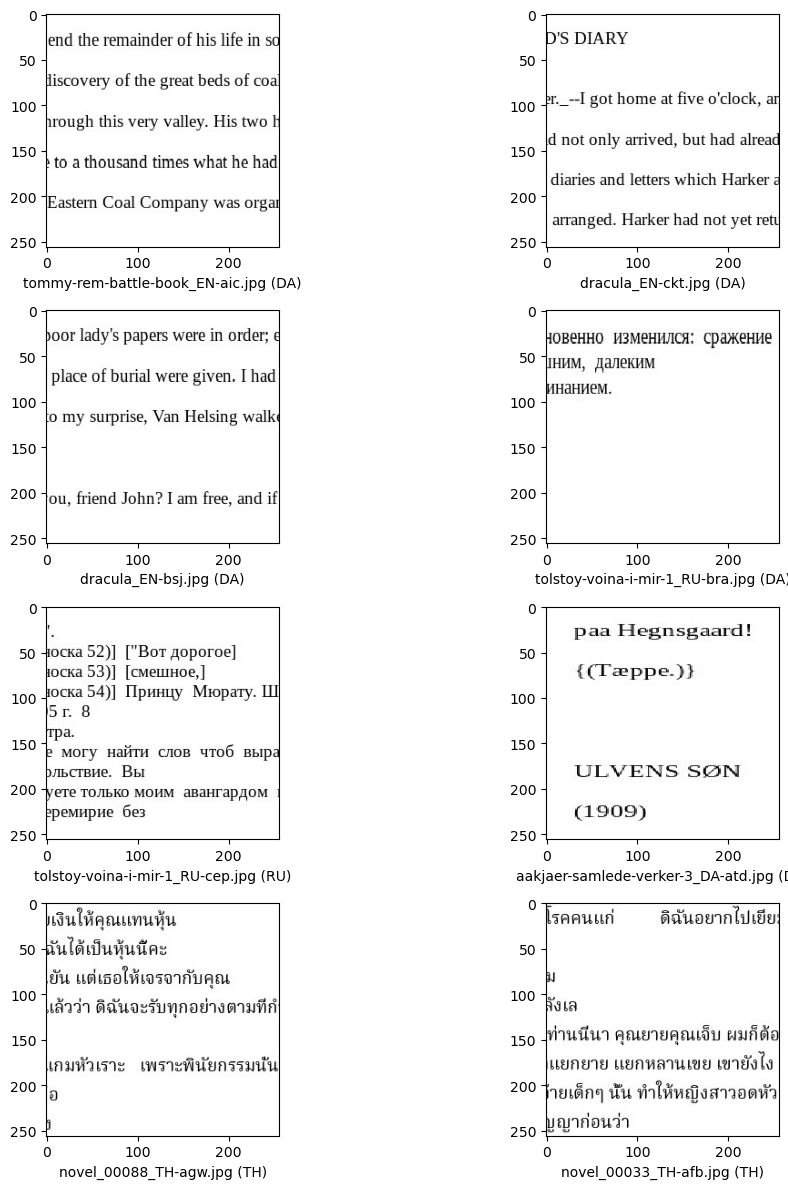

In [7]:
## Validation data preparation:
validationDir = os.path.join(imgDir, "validation-cropped")
fNames = os.listdir(validationDir)
print(len(fNames), "validation images")
validationResults = pd.DataFrame({
    'filename': fNames,
    'category': pd.Series(fNames).str.slice(-10,-8)
})
print(validationResults.shape[0], "validation files read from", validationDir)
validationGenerator = ImageDataGenerator(rescale=1./255).\
    flow_from_dataframe(validationResults,
                        os.path.join(imgDir, "validation-cropped"),
                        x_col='filename',
                        class_mode = None,
                        target_size = imageSize,
                        shuffle = False,
                        # do _not_ randomize the order!
                        # this would clash with the file name order!
                        color_mode="grayscale"
    )

## Make categorical prediction:
print(" --- Predicting on validation data ---")
phat = model.predict(validationGenerator)
print("Predicted probability array shape:", phat.shape)
print("Example:\n", phat[:5])
print(phat)

## Convert labels to categories:
validationResults['predicted'] = pd.Series(np.argmax(phat, axis=1),
                                            index=validationResults.index)
print(validationResults.head())
labelMap = {v: k for k, v in label_map.items()}
validationResults["predicted"] = validationResults.predicted.replace(labelMap)
print("confusion matrix (validation)")
print(pd.crosstab(validationResults.category, validationResults.predicted))
print("Validation accuracy", np.mean(validationResults.category == validationResults.predicted))
print(validationResults.category)
print(validationResults.predicted)

## Print and plot misclassified results - 7 examples
wrongResults = validationResults[validationResults.predicted != validationResults.category]
rows = np.random.choice(wrongResults.index, min(4, wrongResults.shape[0]), replace=False)
print("Example wrong results (validation data)")
print(wrongResults.sample(min(7, wrongResults.shape[0])))

## Plot 4 wrong and 4 correct results
plt.figure(figsize=(12, 12))
index = 1
for row in rows:
    filename = wrongResults.loc[row, 'filename']
    predicted = wrongResults.loc[row, 'predicted']
    img = load_img(os.path.join(imgDir, "validation-cropped", filename), target_size=imageSize)
    plt.subplot(4, 2, index)
    plt.imshow(img)
    plt.xlabel(filename + " ({})".format(predicted))
    index += 1
# now show correct results
index = 5
correctResults = validationResults[validationResults.predicted == validationResults.category]
rows = np.random.choice(correctResults.index,
                        min(4, correctResults.shape[0]), replace=False)
for row in rows:
    filename = correctResults.loc[row, 'filename']
    predicted = correctResults.loc[row, 'predicted']
    img = load_img(os.path.join(imgDir, "validation-cropped", filename), target_size=imageSize)
    plt.subplot(4, 2, index)
    plt.imshow(img)
    plt.xlabel(filename + " ({})".format(predicted))
    index += 1
plt.tight_layout()
plt.show()

### written explanations:
1. My code took a lot longer than I thought since I have a old laptop on the original dataset, I decided to run it on a 1000 sample for the report results... I tried multiple variables for values on each layer, strides, pooling size, and tweaked image size multiple times to get the best accuracy. The following code above with three hidden layers each being 128, 256, 512 size and I had a kernel size of 4 first and 9 in the following layer. <br>
Adding on, Duyen also tried using smaller image size (35x35), the full dataset, kernel 3, filter layer 100-128-512 and got 69.4% but that took around 50 minutes. Since the assignment did say to try with at least 3 differnt models. <br>
2. I tweaked numbers for image pre-processing by increasing shear_range, zoom_range, width_shift_range, and height_shift_range to 0.3 for better accuracy. I also used kernel_size of 9 on the second layer instead of using 4 to decrease run time. I increased first and second layer filter from 64 and 128 to 128 and 256 for better accuracy. <br>
Adding on, Duyen said she tried decreasing image size so she could get faster run time and increased the first layer filter from 64 to 128 for better capture of patterns.
3. It took around max 30 minutes to run on 15 epochs with 1000 image samples. I think it took about a little more than a hour to run on one layer when using the entire dataset. I couldn't run it on that since my laptop sleeps if I open it for more than 15 hrs or either looses network because my home wifi resets once every night. But the model had fairly high accuracy when tested on the sample dataset with accuracy rate of 73%. In total, I think it would be similar accuracy with run time more than 15 hours (perhaps 17 hrs or so) on the original image dataset with more than 30,000 train-image data. Confusion matrix and accuracy on the sample data is all in the last code result!